# Wheel Test 2018 Summary

Summary plot of colson wheels on skippy vs. new/worn magic wheels on Jif. See other notebooks in this folder for per-test details.

In [10]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
date = '2018-09-10'
activity_meta_colson = pd.read_pickle("data/meta-%s.pkl.gz" % date)
activity_data_colson = pd.read_pickle("data/data-%s.pkl.gz" % date)

date = '2018-09-25'
activity_meta_magic_new = pd.read_pickle("data/meta-%s.pkl.gz" % date)
activity_data_magic_new = pd.read_pickle("data/data-%s.pkl.gz" % date)

date = '2018-09-27'
activity_meta_magic_used = pd.read_pickle("data/meta-%s.pkl.gz" % date)
activity_data_magic_used = pd.read_pickle("data/data-%s.pkl.gz" % date)

## TPI Grouped by Direction
Select and pivot summary data for an activity.

In [8]:
pivot = activity_data_colson.pivot(index='id', columns='measure', values='value')
activity_colson = pd.merge(activity_meta_colson, pivot, on='id')
activity_colson['tpi'] = activity_colson['actual_ticks'] / activity_colson['actual_distance']

pivot = activity_data_magic_new.pivot(index='id', columns='measure', values='value')
activity_magic_new = pd.merge(activity_meta_magic_new, pivot, on='id')
activity_magic_new['tpi'] = activity_magic_new['actual_ticks'] / activity_magic_new['actual_distance']

pivot = activity_data_magic_used.pivot(index='id', columns='measure', values='value')
activity_magic_used = pd.merge(activity_meta_magic_used, pivot, on='id')
activity_magic_used['tpi'] = activity_magic_used['actual_ticks'] / activity_magic_used['actual_distance']

Text(0.5, 0.98, 'ticks/in by wheel type')

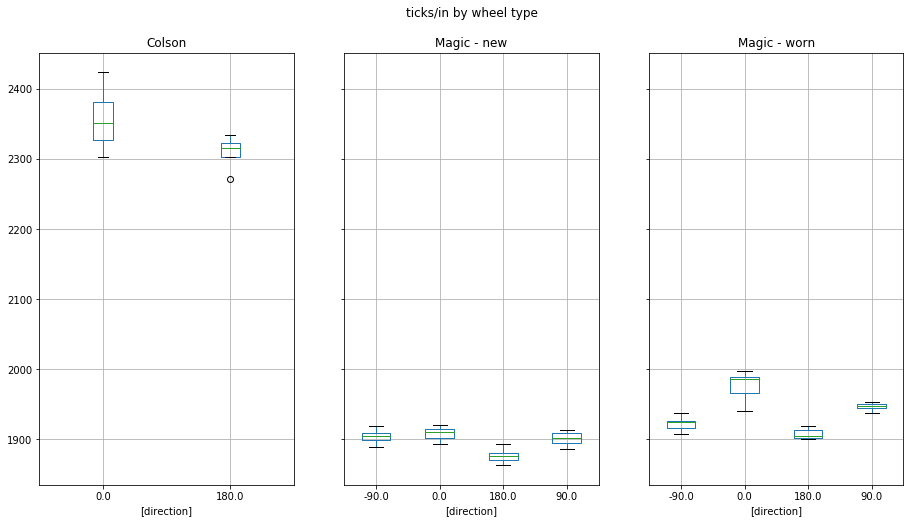

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3,sharey=True)
fig.set_size_inches(15, 8)
activity_colson.boxplot(column='tpi', by=['direction'], ax=ax[0])
activity_magic_new.boxplot(column='tpi', by=['direction'], ax=ax[1])
activity_magic_used.boxplot(column='tpi', by=['direction'], ax=ax[2])
ax[0].set_title("Colson")
ax[1].set_title("Magic - new")
ax[2].set_title("Magic - worn")
fig.suptitle("ticks/in by wheel type")